In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv(r'C:\Users\Mule\Desktop\Data set\Heart2.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [13]:
#data cleaning
df.rename(columns={'BP':'BP_'}, inplace=True)
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [14]:
#adding new columns(data trnsformation)
df["new_Column"] = pd.NaT
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,new_Column
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,NaT
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,NaT
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,NaT
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,NaT
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,NaT
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,NaT
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,NaT
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,NaT


In [15]:
#replacing none values with 0(error correcting)
df.isnull().sum()

Unnamed: 0      0
Age             0
Sex             0
ChestPain       0
RestBP          0
Chol            0
Fbs             0
RestECG         0
MaxHR           0
ExAng           0
Oldpeak         0
Slope           0
Ca              4
Thal            2
AHD             0
new_Column    303
dtype: int64

In [16]:
df['new_Column'] = df['new_Column'].replace(np.nan, 0)
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
new_Column    0
dtype: int64

In [17]:
#model building
from sklearn.linear_model import LinearRegression 

In [18]:
X = df['Sex']
Y = df['Age']

In [19]:
lm = LinearRegression(fit_intercept=False)

In [20]:
lm.fit(df[['Sex']],df.Age)

LinearRegression(fit_intercept=False)

<AxesSubplot:xlabel='Sex'>

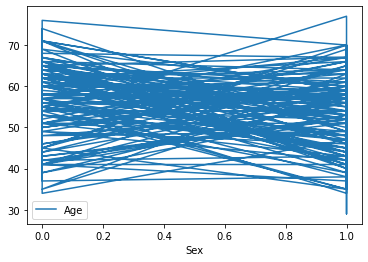

In [21]:
df.plot(kind= 'line', x='Sex' , y='Age')

In [22]:
lm.coef_

array([53.83495146])

In [23]:
lm.predict([[8]])

array([430.67961165])